In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

# LOAD DF

In [2]:
new_df_with_medical_history = pd.read_csv('new_df_with_medical_history.csv', encoding='utf-8').drop(columns = 'Unnamed: 0')

In [3]:
l = [x for x in list(new_df_with_medical_history.columns) if x!= 'HOSPITAL' and x!='DIED' and x!='COVID-19 POSITIVE' ]

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def corr_heatmap(data_frame, size=11):
  correlation = data_frame.corr()
  fig, heatmap = plt.subplots(figsize=(size, size))
  heatmap.matshow(correlation)
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)
  plt.show()


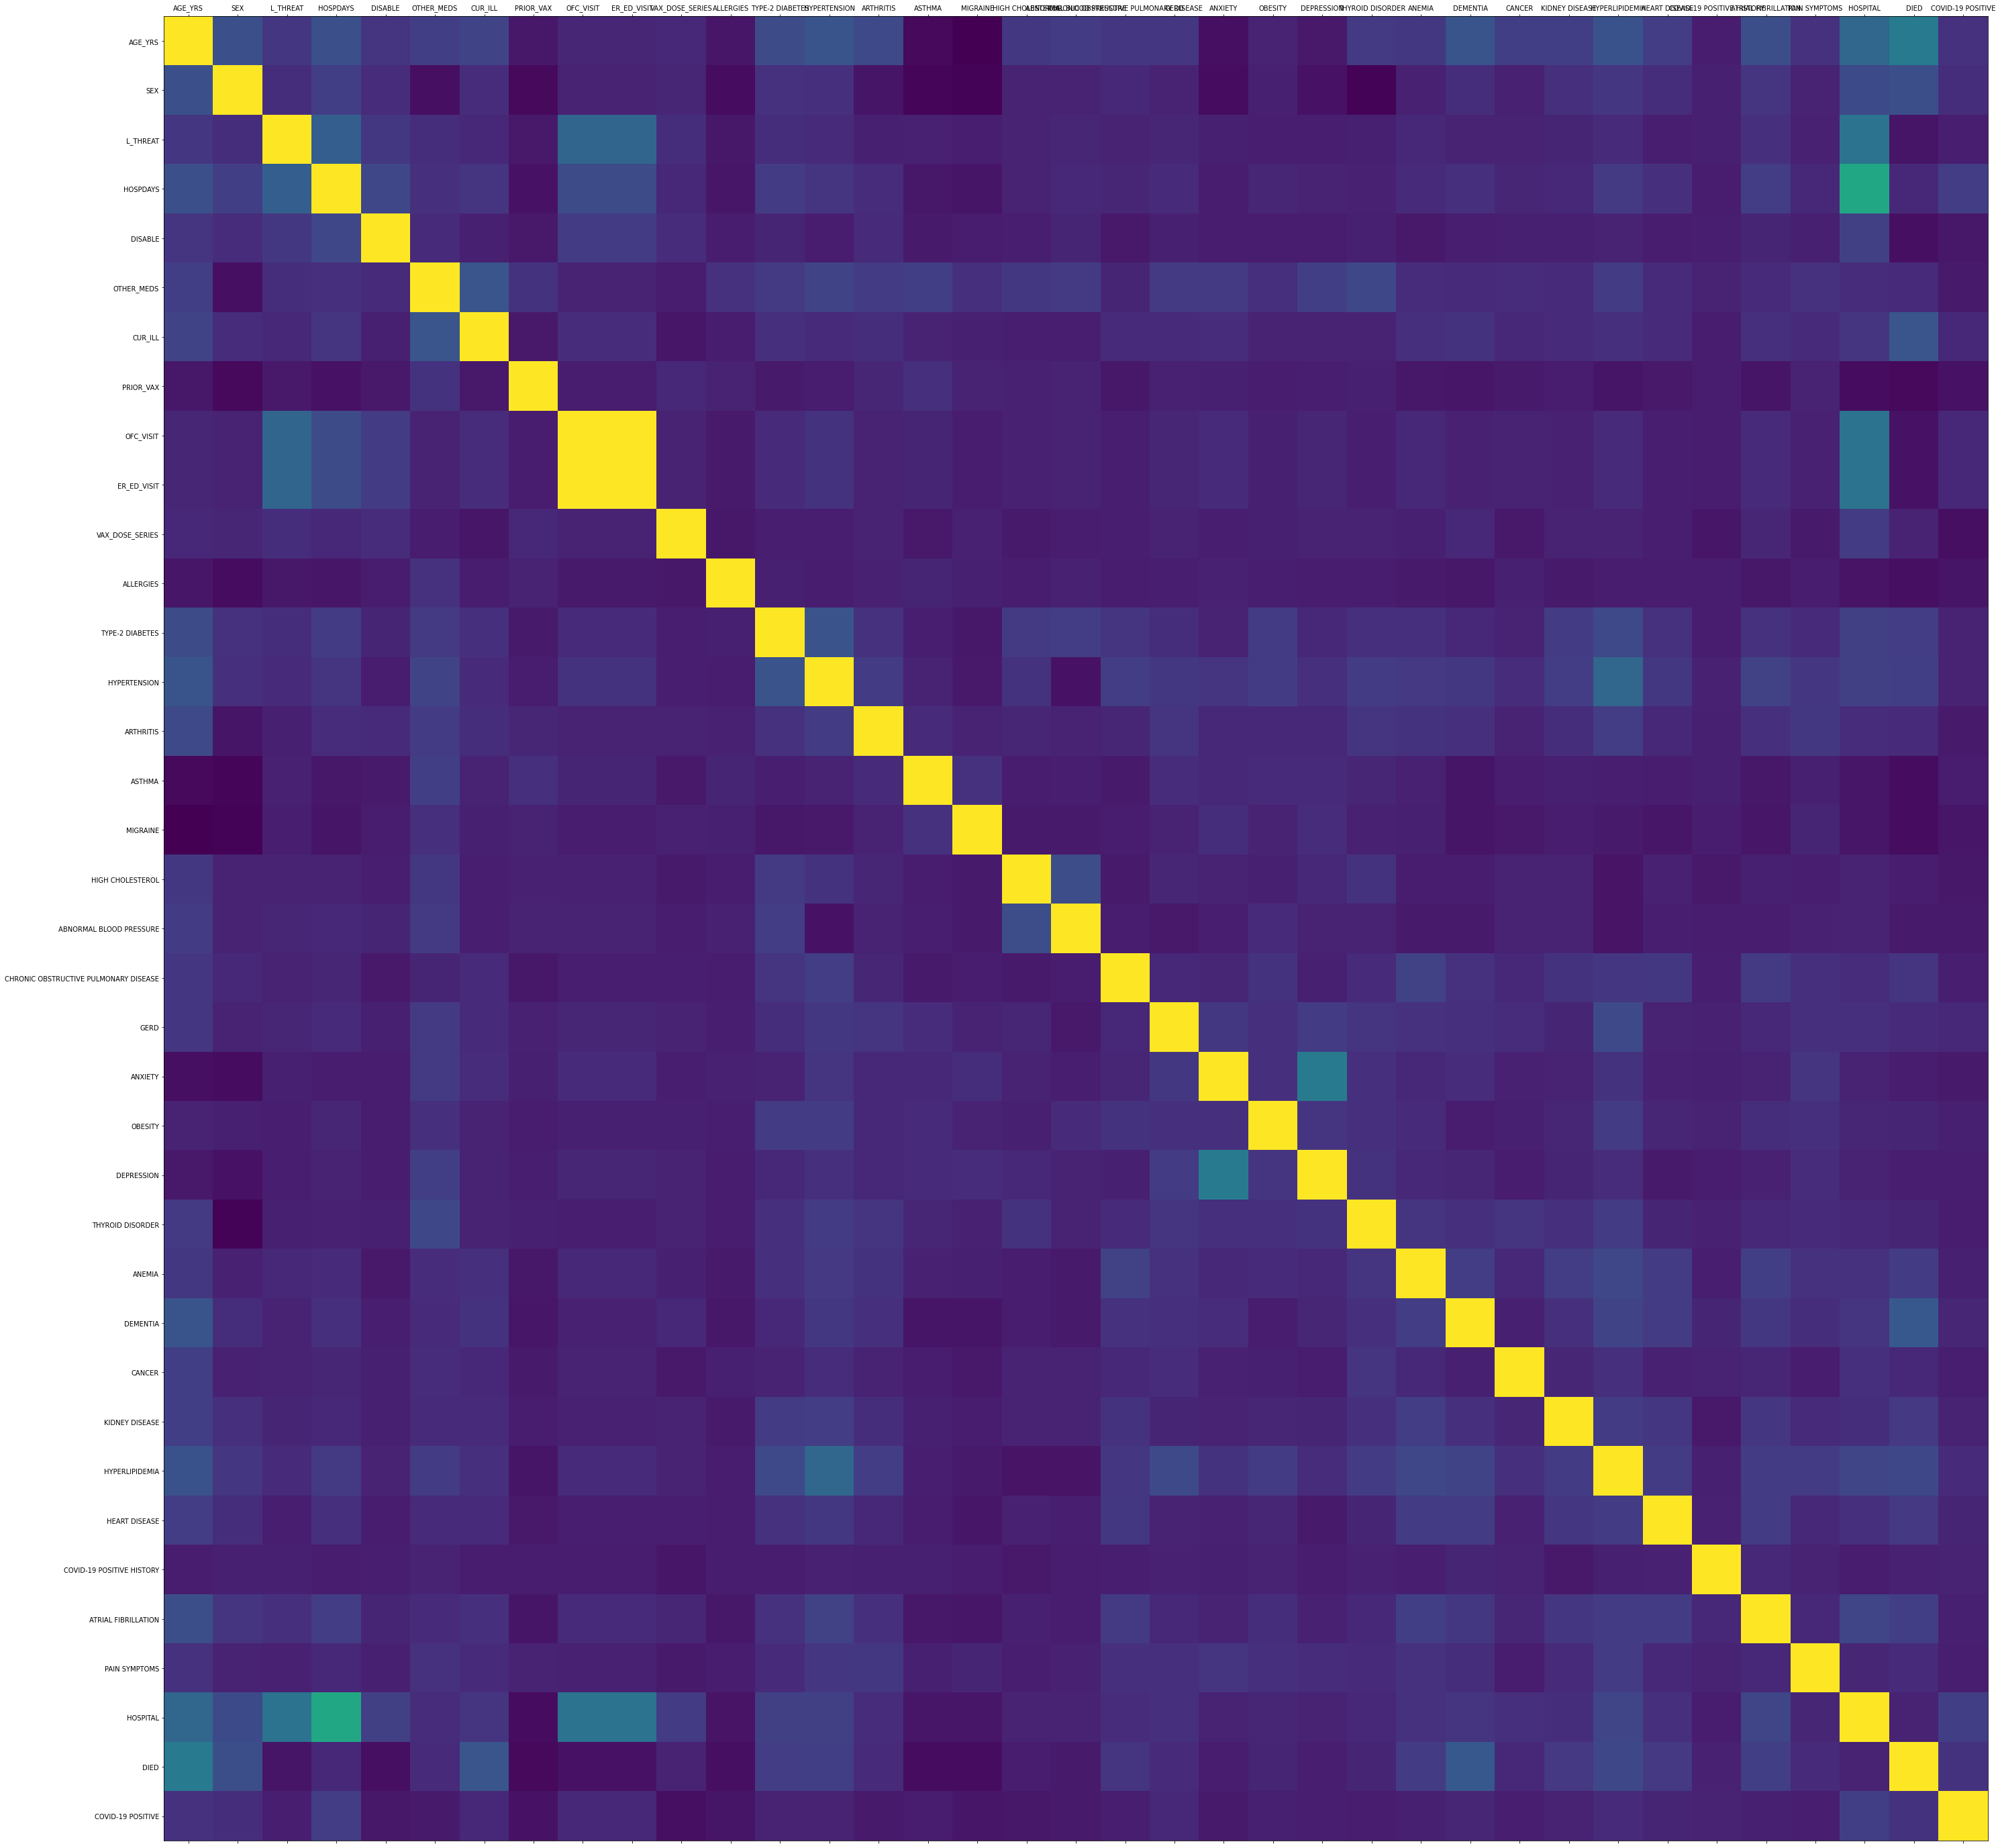

In [5]:
corr_heatmap(new_df_with_medical_history,50)

# SPLIT X AND Y VALUES FOR MEDICAL HISTORIES (HOSPITAL)

In [4]:
clm = new_df_with_medical_history.columns
feature_column_names = clm[:-3]

predicted_class_name = ['HOSPITAL']

X = new_df_with_medical_history[feature_column_names].values
y = new_df_with_medical_history[predicted_class_name].values



In [7]:
len(X)

32302

# SMOTING 

In [6]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
X, y = sm.fit_resample(X, y) 



# SPLIT THE TRAIN AND TEST DATA

In [8]:
split_test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

print("{0:0.2f}% in training set".format((len(X_train)/len(new_df_with_medical_history.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(new_df_with_medical_history.index)) * 100))



138.98% in training set
34.75% in test set


# STANDARD SCALLING

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# APPLY MODEL

In [10]:
# evaluate bagging algorithm for classification
from numpy import mean
from sklearn.model_selection import KFold, cross_val_score
from numpy import std
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics
import sklearn.metrics as metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from numpy import hstack
from sklearn.model_selection import KFold
from numpy import vstack
from numpy import asarray
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


C:\Users\User\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:


# create a list of base-models
def get_models():
	models = list()
	models.append(LogisticRegression(solver='liblinear'))
	models.append(DecisionTreeClassifier())
	models.append(SVC(gamma='scale', probability=True))
	models.append(GaussianNB())
	models.append(KNeighborsClassifier())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier(n_estimators=10))
	models.append(RandomForestClassifier(criterion = 'gini', n_estimators = 30, random_state = 0))
	models.append(ExtraTreesClassifier(n_estimators=10))
	models.append(GradientBoostingClassifier())
	models.append(lgb.LGBMClassifier())
	models.append(XGBClassifier())
	return models


def vector_df(X,y,ALL_X):
    df_y = pd.DataFrame(y, columns=['HOSPITAL'])
    df_x = pd.DataFrame(X, columns= [ 'logic0','logic1','dt0','dt1','svc0','svc1','gnb0','gnb1','kn0','kn1','ab0','ab1','bc0','bc1','rfc0','rfc1','extc0','extc1','gbc0','gbc1','lgbm0','lgbm1','xgb0','xgb1'])
    DFX = pd.DataFrame(ALL_X, columns=l)
    abc = df_x.reset_index(drop=True)
    efg = df_y.reset_index(drop = True)
    ijk = DFX.reset_index(drop = True)
    df = pd.concat([ijk,abc,efg], axis=1)
    return df



def fit_base_model(X,y,model):
    for model in models:
        print(f"Fitted to Model: {model}\n")
        model.fit(X,y)

def evaluate_models(X, y, models):
    for model in models:
        print(f"Model: {model}\n")
        y_pred = model.predict(X)
        print ("Confusion Matrix")
        # labels for set 1=True to upper left and 0 = False to lower right
        print ("{0}".format(metrics.confusion_matrix(y, y_pred, labels=[1, 0])))
        print ("{0}".format(metrics.classification_report(y, y_pred, labels=[1, 0])))
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        test_acc = metrics.accuracy_score(y, y_pred)
        auc = roc_auc_score(y, y_pred)
        logloss = log_loss(y, y_pred)
        print(f"Test Accuracies: {test_acc}\n")
        print(f"precision: {precision}\n")
        print(f"recall: {recall}\n")    
        print(f"f1: {f1}\n")
        print(f"auc: {auc}\n")
        print(f"logloss: {logloss}\n")

def fit_custom_model_rf(X,y):
    model = RandomForestClassifier(criterion = 'gini', n_estimators = 30, random_state = 0)
    model.fit(X, y)
    return model
def fit_custom_model_xgb(X,y):
    model = XGBClassifier()
    model.fit(X, y)
    return model
def fit_custom_model_gbc(X,y):
    model = GradientBoostingClassifier()
    model.fit(X, y)
    return model
def fit_custom_model_etc(X,y):
    model = ExtraTreesClassifier(n_estimators=10)
    model.fit(X, y)
    return model
def fit_custom_model_bc(X,y):
    model = BaggingClassifier(n_estimators=10)
    model.fit(X, y)
    return model
def fit_custom_model_ab(X,y):
    model = AdaBoostClassifier()
    model.fit(X, y)
    return model
def fit_custom_model_knc(X,y):
    model = KNeighborsClassifier()
    model.fit(X, y)
    return model
def fit_custom_model_gnb(X,y):
    model =GaussianNB()
    model.fit(X, y)
    return model
def fit_custom_model_svc(X,y):
    model = SVC(gamma='scale', probability=True)
    model.fit(X, y)
    return model
def fit_custom_model_dc(X,y):
    model = DecisionTreeClassifier()
    model.fit(X, y)
    return model

def fit_custom_model_lr(X,y):
    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)
    return model
def fit_custom_model_lgbm(X,y):
    model = lgb.LGBMClassifier()
    model.fit(X, y)
    return model  

# make predictions with stacked model
def evaluate_custom_model(X,y, models,cm):
	meta_X = list()
	for model in models:
		yhat = model.predict_proba(X)
		meta_X.append(yhat)
	meta_X = hstack(meta_X)
	meta_X = np.concatenate((X,meta_X),axis=1)
	# predict
	y_pred = cm.predict(meta_X)
	print ("Confusion Matrix")
	# labels for set 1=True to upper left and 0 = False to lower right
	print ("{0}".format(metrics.confusion_matrix(y, y_pred, labels=[1, 0])))
	print ("{0}".format(metrics.classification_report(y, y_pred, labels=[1, 0])))
	precision = precision_score(y, y_pred)
	recall = recall_score(y, y_pred)
	f1 = f1_score(y, y_pred)
	test_acc = metrics.accuracy_score(y, y_pred)
	auc = roc_auc_score(y, y_pred)
	logloss = log_loss(y, y_pred)
	print(f"Test Accuracies: {test_acc}\n")
	print(f"precision: {precision}\n")
	print(f"recall: {recall}\n")    
	print(f"f1: {f1}\n")
	print(f"auc: {auc}\n")
	print(f"logloss: {logloss}\n")

# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y,TEST_X = list(), list(),list()
	# define split of data
	kfold = KFold(n_splits=10, shuffle=True)
	# enumerate splits
	for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		X_LIST = list()
		# get data
		train_X, test_X = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]
		meta_y.extend(test_y)
		X_LIST.append(test_X)
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y)
			yhat = model.predict_proba(test_X)
			# store columns
			fold_yhats.append(yhat)
		# store fold yhats as columns
		meta_X.append(hstack(fold_yhats))
		TEST_X.append(hstack(X_LIST))
	return vstack(meta_X), asarray(meta_y),vstack(TEST_X)



# FIT TO THE BASE AND CUSTOM MODEL

In [12]:
models = get_models()
# fit base model
fit_base_model(X_train,y_train,models)
# get out of fold predictions
meta_X, meta_y,test_x = get_out_of_fold_predictions(X_train, y_train, models)
# find the df
df = vector_df(meta_X, meta_y,test_x)
# find the columns of df
clm = df.columns
#extract feature column
feature_column_names = clm[:-1]
#extract target column
predicted_class_name = ['HOSPITAL']
#extract train data from custome df 
fit_x = df[feature_column_names].values
fit_y = df[predicted_class_name].values



Fitted to Model: LogisticRegression(solver='liblinear')

Fitted to Model: DecisionTreeClassifier()

Fitted to Model: SVC(probability=True)

Fitted to Model: GaussianNB()

Fitted to Model: KNeighborsClassifier()

Fitted to Model: AdaBoostClassifier()

Fitted to Model: BaggingClassifier()

Fitted to Model: RandomForestClassifier(n_estimators=30, random_state=0)

Fitted to Model: ExtraTreesClassifier(n_estimators=10)

Fitted to Model: GradientBoostingClassifier()

Fitted to Model: LGBMClassifier()

Fitted to Model: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=

C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:17:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:23:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:41:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
# fit custom model and find the custom model

m_lr = fit_custom_model_lr(fit_x,fit_y)
m_dc = fit_custom_model_dc(fit_x,fit_y)
m_svc = fit_custom_model_svc(fit_x,fit_y)
m_gnb= fit_custom_model_gnb(fit_x,fit_y)
m_knc = fit_custom_model_knc(fit_x,fit_y)
m_ab = fit_custom_model_ab(fit_x,fit_y)
m_bc = fit_custom_model_bc(fit_x,fit_y)
m_etc = fit_custom_model_etc(fit_x,fit_y)
m_gbc = fit_custom_model_gbc(fit_x,fit_y)
m_xgb = fit_custom_model_xgb(fit_x,fit_y)
m_lgbm = fit_custom_model_lgbm(fit_x,fit_y)
m_rf = fit_custom_model_rf(fit_x,fit_y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

[13:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# EVALUATE THE BASE MODEL

In [14]:
evaluate_models(X_test, y_test, models)

Model: LogisticRegression(solver='liblinear')

Confusion Matrix
[[2786  411]
 [ 122 3142]]
              precision    recall  f1-score   support

           1       0.96      0.87      0.91      3197
           0       0.88      0.96      0.92      3264

    accuracy                           0.92      6461
   macro avg       0.92      0.92      0.92      6461
weighted avg       0.92      0.92      0.92      6461

Test Accuracies: 0.9175050301810865

precision: 0.9580467675378267

recall: 0.8714419768532999

f1: 0.9126945126945127

auc: 0.9170322629364539

logloss: 2.849290414699564

Model: DecisionTreeClassifier()

Confusion Matrix
[[3049  148]
 [  70 3194]]
              precision    recall  f1-score   support

           1       0.98      0.95      0.97      3197
           0       0.96      0.98      0.97      3264

    accuracy                           0.97      6461
   macro avg       0.97      0.97      0.97      6461
weighted avg       0.97      0.97      0.97      6461

Test 

# EVALUATE THE CUSTOM MODEL

In [15]:
evaluate_custom_model(X_test,y_test,models,m_lr)

Confusion Matrix
[[3068  129]
 [  29 3235]]
              precision    recall  f1-score   support

           1       0.99      0.96      0.97      3197
           0       0.96      0.99      0.98      3264

    accuracy                           0.98      6461
   macro avg       0.98      0.98      0.98      6461
weighted avg       0.98      0.98      0.98      6461

Test Accuracies: 0.975545581179384

precision: 0.9906360994510817

recall: 0.9596496715670941

f1: 0.974896727041627

auc: 0.9753824338227627

logloss: 0.844629292481252



In [16]:

evaluate_custom_model(X_test,y_test,models,m_dc)

Confusion Matrix
[[3074  123]
 [  93 3171]]
              precision    recall  f1-score   support

           1       0.97      0.96      0.97      3197
           0       0.96      0.97      0.97      3264

    accuracy                           0.97      6461
   macro avg       0.97      0.97      0.97      6461
weighted avg       0.97      0.97      0.97      6461

Test Accuracies: 0.9665686426249807

precision: 0.9706346700347331

recall: 0.9615264310290897

f1: 0.9660590823381521

auc: 0.9665168919851331

logloss: 1.1546896864048477



In [17]:
evaluate_custom_model(X_test,y_test,models,m_svc)

Confusion Matrix
[[3059  138]
 [  21 3243]]
              precision    recall  f1-score   support

           1       0.99      0.96      0.97      3197
           0       0.96      0.99      0.98      3264

    accuracy                           0.98      6461
   macro avg       0.98      0.98      0.98      6461
weighted avg       0.98      0.98      0.98      6461

Test Accuracies: 0.9753908063767218

precision: 0.9931818181818182

recall: 0.9568345323741008

f1: 0.9746694280707344

auc: 0.9752003544223444

logloss: 0.8499740347216899



In [18]:
evaluate_custom_model(X_test,y_test,models,m_gnb)

Confusion Matrix
[[3082  115]
 [  53 3211]]
              precision    recall  f1-score   support

           1       0.98      0.96      0.97      3197
           0       0.97      0.98      0.97      3264

    accuracy                           0.97      6461
   macro avg       0.97      0.97      0.97      6461
weighted avg       0.97      0.97      0.97      6461

Test Accuracies: 0.9739978331527628

precision: 0.9830940988835726

recall: 0.9640287769784173

f1: 0.9734680985470625

auc: 0.9738955159401891

logloss: 0.8980895856692154



In [19]:
evaluate_custom_model(X_test,y_test,models,m_knc)

Confusion Matrix
[[3089  108]
 [  88 3176]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      3197
           0       0.97      0.97      0.97      3264

    accuracy                           0.97      6461
   macro avg       0.97      0.97      0.97      6461
weighted avg       0.97      0.97      0.97      6461

Test Accuracies: 0.9696641386782232

precision: 0.9723009128108279

recall: 0.9662183296840788

f1: 0.9692500784436775

auc: 0.9696287726851766

logloss: 1.047774421602903



In [20]:
evaluate_custom_model(X_test,y_test,models,m_ab)

Confusion Matrix
[[3065  132]
 [  27 3237]]
              precision    recall  f1-score   support

           1       0.99      0.96      0.97      3197
           0       0.96      0.99      0.98      3264

    accuracy                           0.98      6461
   macro avg       0.98      0.98      0.98      6461
weighted avg       0.98      0.98      0.98      6461

Test Accuracies: 0.9753908063767218

precision: 0.991267787839586

recall: 0.9587112918360964

f1: 0.9747177611702973

auc: 0.9752196165062834

logloss: 0.8499747772668967



In [21]:
evaluate_custom_model(X_test,y_test,models,m_bc)

Confusion Matrix
[[3061  136]
 [  30 3234]]
              precision    recall  f1-score   support

           1       0.99      0.96      0.97      3197
           0       0.96      0.99      0.97      3264

    accuracy                           0.97      6461
   macro avg       0.97      0.97      0.97      6461
weighted avg       0.97      0.97      0.97      6461

Test Accuracies: 0.974307382758087

precision: 0.990294403105791

recall: 0.9574601188614326

f1: 0.9736005089058524

auc: 0.9741344711954221

logloss: 0.8873952746444955



In [22]:
evaluate_custom_model(X_test,y_test,models,m_etc)

Confusion Matrix
[[3071  126]
 [  38 3226]]
              precision    recall  f1-score   support

           1       0.99      0.96      0.97      3197
           0       0.96      0.99      0.98      3264

    accuracy                           0.97      6461
   macro avg       0.98      0.97      0.97      6461
weighted avg       0.97      0.97      0.97      6461

Test Accuracies: 0.9746169323634112

precision: 0.9877774203924091

recall: 0.960588051298092

f1: 0.9739930225182366

auc: 0.9744729472176735

logloss: 0.8767048001033438



In [23]:
evaluate_custom_model(X_test,y_test,models,m_gbc)

Confusion Matrix
[[3069  128]
 [  25 3239]]
              precision    recall  f1-score   support

           1       0.99      0.96      0.98      3197
           0       0.96      0.99      0.98      3264

    accuracy                           0.98      6461
   macro avg       0.98      0.98      0.98      6461
weighted avg       0.98      0.98      0.98      6461

Test Accuracies: 0.9763194551926946

precision: 0.9919198448610214

recall: 0.9599624648107601

f1: 0.9756795422031473

auc: 0.9761515755426349

logloss: 0.817900135947546



In [24]:
evaluate_custom_model(X_test,y_test,models,m_xgb)

Confusion Matrix
[[3077  120]
 [  34 3230]]
              precision    recall  f1-score   support

           1       0.99      0.96      0.98      3197
           0       0.96      0.99      0.98      3264

    accuracy                           0.98      6461
   macro avg       0.98      0.98      0.98      6461
weighted avg       0.98      0.98      0.98      6461

Test Accuracies: 0.9761646803900325

precision: 0.9890710382513661

recall: 0.9624648107600876

f1: 0.9755865567533291

auc: 0.9760240720467105

logloss: 0.8232469820660698



In [25]:
evaluate_custom_model(X_test,y_test,models,m_lgbm)

Confusion Matrix
[[3071  126]
 [  29 3235]]
              precision    recall  f1-score   support

           1       0.99      0.96      0.98      3197
           0       0.96      0.99      0.98      3264

    accuracy                           0.98      6461
   macro avg       0.98      0.98      0.98      6461
weighted avg       0.98      0.98      0.98      6461

Test Accuracies: 0.9760099055873703

precision: 0.9906451612903225

recall: 0.960588051298092

f1: 0.9753851040177862

auc: 0.9758516236882616

logloss: 0.8285920955791111



In [26]:
evaluate_custom_model(X_test,y_test,models,m_rf)


Confusion Matrix
[[3081  116]
 [  36 3228]]
              precision    recall  f1-score   support

           1       0.99      0.96      0.98      3197
           0       0.97      0.99      0.98      3264

    accuracy                           0.98      6461
   macro avg       0.98      0.98      0.98      6461
weighted avg       0.98      0.98      0.98      6461

Test Accuracies: 0.9764742299953567

precision: 0.9884504331087585

recall: 0.9637159837347513

f1: 0.9759265125118783

auc: 0.9763432859850227

logloss: 0.8125557649797115

